### Numerical Methods For Boundary Value Problems:Drichlet's BCs

$$-\frac{d^2u}{dx^2} = f(x), \quad x\in[a, b]$$ with the following boundary conditions
$$u(a)= \alpha, \quad u(b) = \beta$$
using finite difference method, where $f(x) = \sin(\pi x) $  given right hand side function.

#### Discretize the interval to a Grid
$$x_0 = a, x_1 = a+h, x_2 = a+2h, \dots, x_{N+1} = b$$
Note 
$$h(N+1) = b-a.$$
#### At the inner  discrete points the differential equation becomes,
            
\begin{align}
-\frac{u_2-2u_1}{h^2} & = f(x_1) \\
-\frac{u_{i+1}-2u_i+u_{i-1}}{h^2} & =f(x_i)\quad i=1=2,3,\dots,N-1\\
-\frac{-2u_N+u_{N-1}}{h^2} &= f(x_N)
\end{align}
Moreover, form the boundary conditions,

$$u_0= \alpha,\quad u_{N+1}=\beta .$$ 
#### The systme of equation can be written in matrix form:  $ A\textbf{u} = \textbf{b} $, where

$$ A =\left(\begin{array}{ccccc}
2&-1&0&0&\dots\\
-1&2&-1&0&\dots\\
& &\dots & &\\
\dots&0&-1&2&-1\\
\dots&0&0&-1&2
\end{array} \right),\quad \textbf{b} = h^2\left(\begin{array}{c}
		f(x_1)\\f(x_2)\\\vdots\\f(x_{N-1})\\f(x_N)
		\end{array} \right)    $$


#### Python Implimentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a, b = [0, 1]
alpha = 0
beta = 0
N = 100
h =(b-a)/(N+1)  # step size
xp = np.arange(a, b+h, h) # Discretize the domain (Grid)
x = np.arange(a+h, b, h)  # Inner points

In [3]:
#Define the right side function
f = lambda x: np.sin(np.pi*x)

In [11]:
# Initialize the matrix coefficient matrix A and the right side column vector B
b = np.zeros(len(x))
A = np.zeros((N,N))

In [5]:
# Setting the enteries b
for i in range(0, len(x)):
    b[i] = h**2*f(x[i])

In [6]:
# Setting the enteries for A
for k in range(0, N-1):
    A[k][k] = 2      # the diagonal entries
    A[k][k+1] = -1   # the upper diagonal entries
    A[k+1][k] = -1   # the lowr diagnoal entries
A[-1][-1] = 2

In [7]:
# solve the equation to determine the approximation of the unknowns in the interior grid points
u = np.dot(np.linalg.inv(A),b) 

In [8]:
# Inclue the boundary values to the solution
result = np.zeros(len(xp))
result[0] = alpha
result[-1] = beta
result[1:len(xp)-1] = u[:]

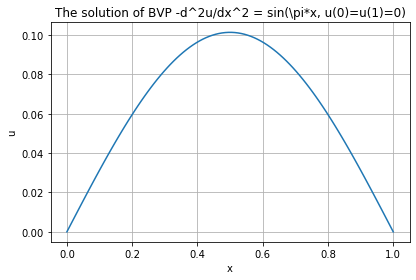

In [14]:
# Plot the solution
plt.plot(xp,result)
plt.xlabel('x')
plt.ylabel('u')
plt.title('The solution of BVP -d^2u/dx^2 = sin(\pi*x, u(0)=u(1)=0)')
plt.tight_layout() 
plt.grid()
plt.show()
